Seaborn tutorial via pokemon dataset

In [1]:
tutorial_url = 'https://elitedatascience.com/python-seaborn-tutorial'

In [2]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
poke = pd.read_csv('Pokemon.csv', index_col=0, encoding='ISO-8859-1')

poke.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


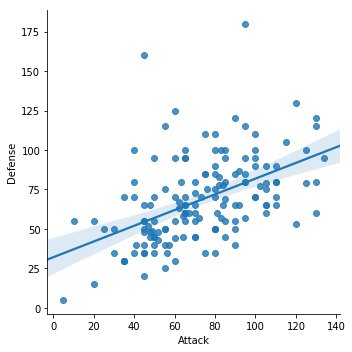

In [5]:
# lmplot - scatter plot of attack versus defense

sns.lmplot(x='Attack',y='Defense',data=poke)

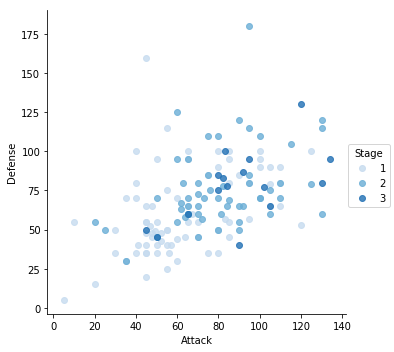

In [6]:
# lmplot - remove regression line and hue by stage

sns.lmplot(x='Attack',y='Defense',data=poke,
           fit_reg=False,hue='Stage',palette='Blues')

(0, 100)

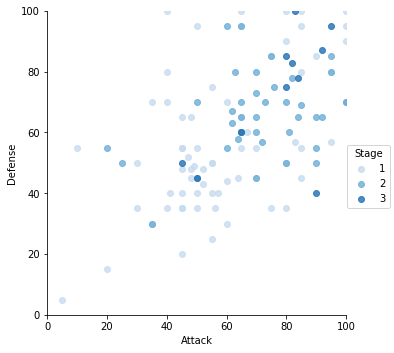

In [7]:
# lmplot - reducing axis length

sns.lmplot(x='Attack',y='Defense',data=poke,
           fit_reg=False,hue='Stage',palette='Blues')

plt.ylim(0, 100)
plt.xlim(0, 100)

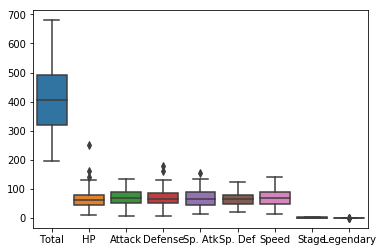

In [8]:
# boxplot - all stats

sns.boxplot(data=poke)

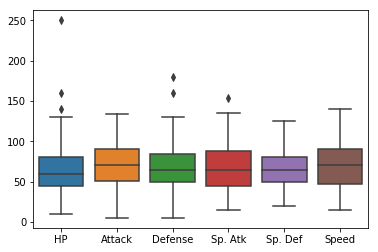

In [9]:
# boxplot - dropping non-combat stats

poke_stats = poke.drop(['Total', 'Stage', 'Legendary'], axis=1)

sns.boxplot(data=poke_stats)

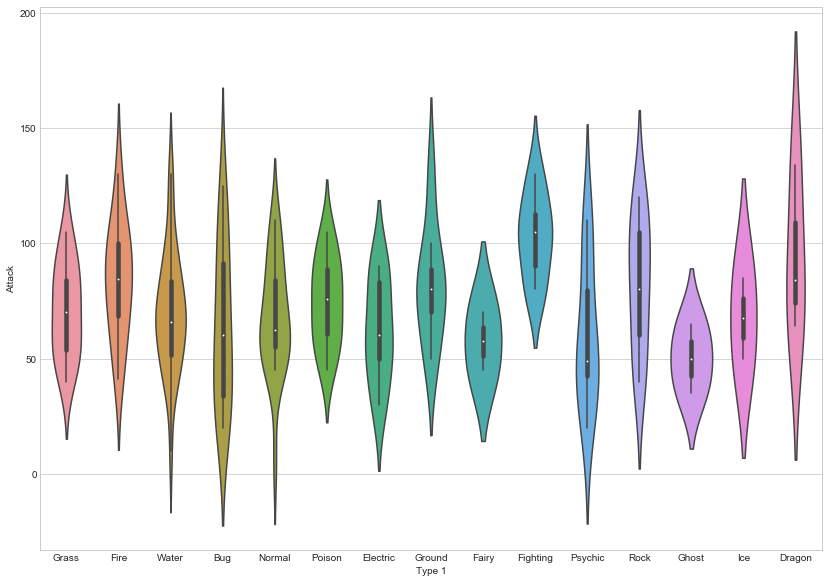

In [10]:
# violin plot - including figsize to adjust plot size; must be above violin plot code

sns.set_style('whitegrid')

plt.figure(figsize = (14,10))

sns.violinplot(x='Type 1',y='Attack',data=poke)

In [11]:
# list of color for type 1 palette

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

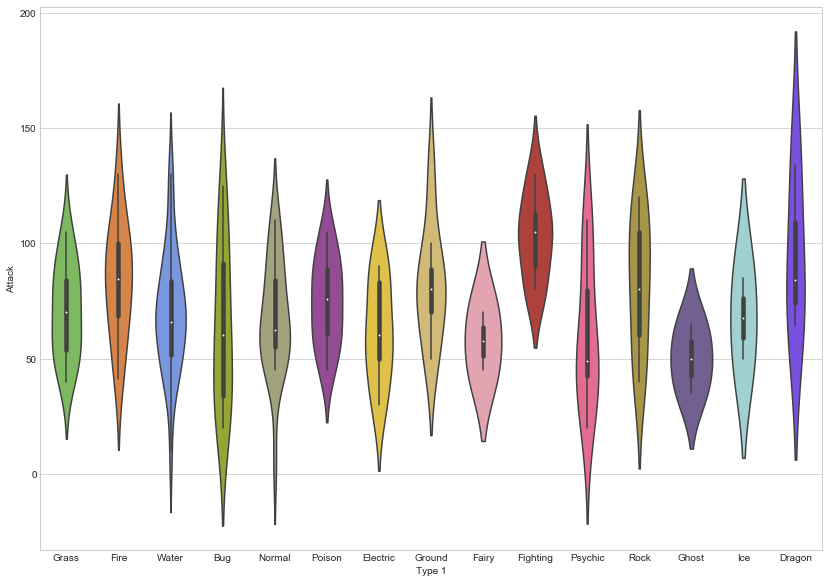

In [12]:
# violin plot - with matching palette

plt.figure(figsize = (14,10))

sns.violinplot(x='Type 1',y='Attack',data=poke, palette=pkmn_type_colors)

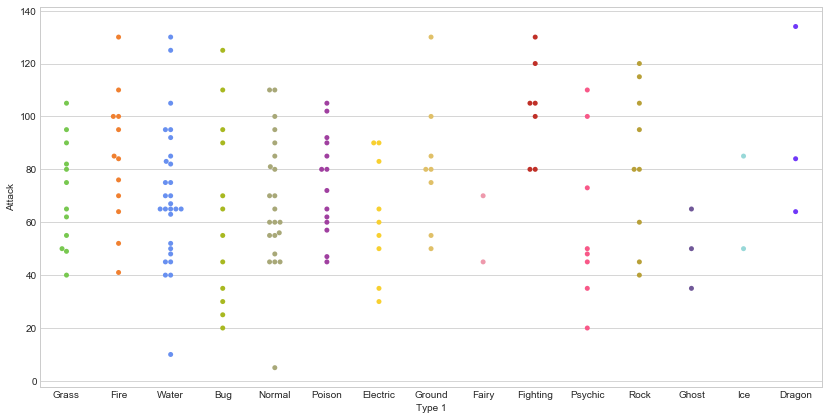

In [13]:
# swarm plot

plt.figure(figsize=(14,7))

sns.swarmplot(x='Type 1',y='Attack',data=poke,palette=pkmn_type_colors)

Text(0.5,1,'Attack by Type')

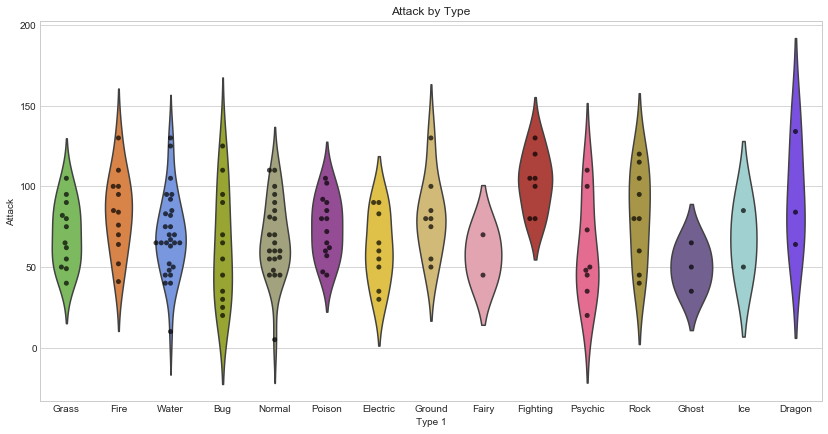

In [14]:
# Overlaying plots

plt.figure(figsize=(14,7))

sns.violinplot(x='Type 1',y='Attack',data=poke,
               inner=None,palette=pkmn_type_colors)

sns.swarmplot(x='Type 1',y='Attack',data=poke,
              color='k',alpha=0.7)

plt.title('Attack by Type')

In [15]:
# Some filtering to verify plot

In [16]:
poke[poke['Type 1'] == 'Ice']

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
124,Jynx,Ice,Psychic,455,65,50,35,115,95,95,1,False
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True


In [17]:
poke[ (poke['Type 1'] == 'Ghost') | (poke['Type 1'] == 'Ice') ]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
92,Gastly,Ghost,Poison,310,30,35,30,100,35,80,1,False
93,Haunter,Ghost,Poison,405,45,50,45,115,55,95,2,False
94,Gengar,Ghost,Poison,500,60,65,60,130,75,110,3,False
124,Jynx,Ice,Psychic,455,65,50,35,115,95,95,1,False
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True


In [18]:
poke[ ((poke['Type 1'] == 'Ghost') | (poke['Type 1'] == 'Ice')) & (poke['Speed'] > 90)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
93,Haunter,Ghost,Poison,405,45,50,45,115,55,95,2,False
94,Gengar,Ghost,Poison,500,60,65,60,130,75,110,3,False
124,Jynx,Ice,Psychic,455,65,50,35,115,95,95,1,False


In [19]:
# Melting columns

poke_melt = pd.melt(poke_stats,id_vars=['Name','Type 1','Type 2'],
                    var_name='Stat')

poke_melt.tail()

,Name,Type 1,Type 2,Stat,value
901,Dratini,Dragon,NaN,Speed,50
902,Dragonair,Dragon,NaN,Speed,70
903,Dragonite,Dragon,Flying,Speed,80
904,Mewtwo,Psychic,NaN,Speed,130
905,Mew,Psychic,NaN,Speed,100


In [20]:
print(poke_stats.shape)
print(poke_melt.shape)

(151, 9)
(906, 5)


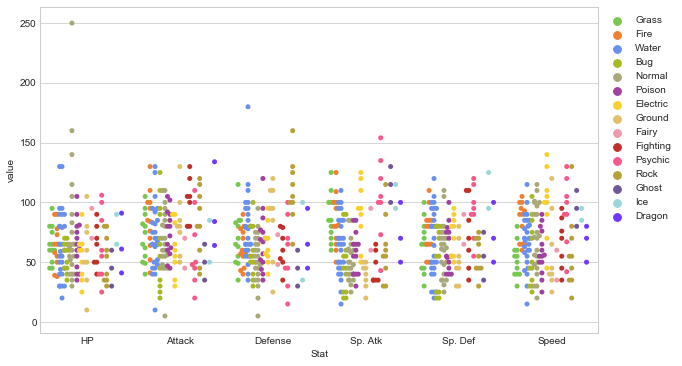

In [21]:
# swarm plot for melted dataframe

plt.figure(figsize=(10,6))

sns.swarmplot(x='Stat',y='value',data=poke_melt,
              hue='Type 1',dodge=True,palette=pkmn_type_colors)

plt.legend(bbox_to_anchor=(1,1),loc=2)

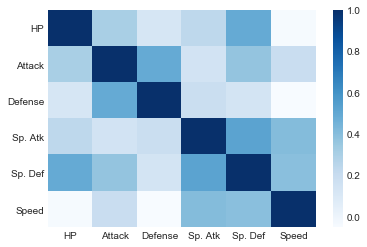

In [22]:
# heat map

poke_corr = poke_stats.corr()

sns.heatmap(poke_corr,cmap='Blues')

C:\Users\liamk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


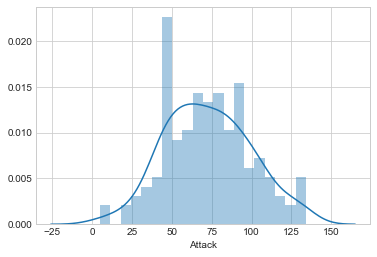

In [23]:
# histogram

sns.distplot(poke.Attack,bins=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

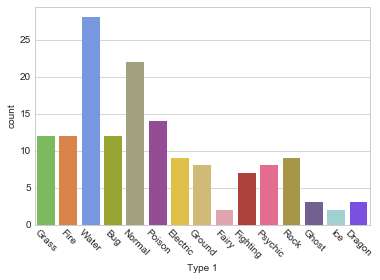

In [24]:
# bar plot

sns.countplot(x='Type 1',data=poke,palette=pkmn_type_colors)

plt.xticks(rotation=-45)

In [25]:
poke[poke['Type 1'] == 'Fairy']

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
35,Clefairy,Fairy,NaN,323,70,45,48,60,65,35,1,False
36,Clefable,Fairy,NaN,483,95,70,73,95,90,60,2,False


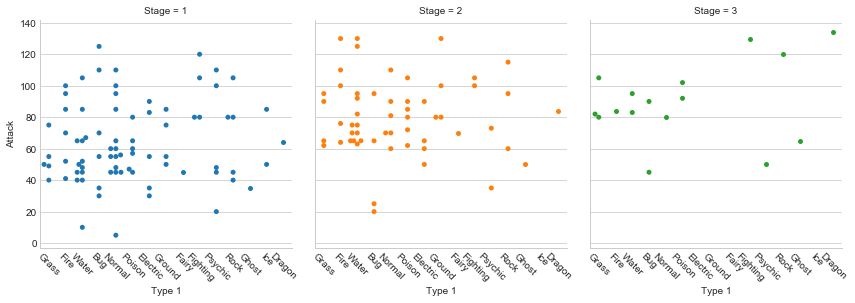

In [26]:
# factor plot

fp = sns.factorplot(x='Type 1',y='Attack',data=poke,
                    hue='Stage',col='Stage',kind='swarm')

fp.set_xticklabels(rotation=-45)

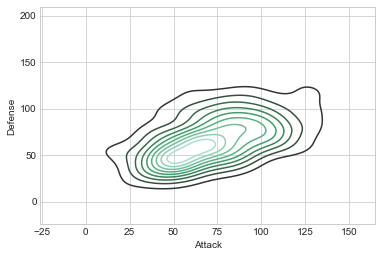

In [27]:
# density plot

sns.kdeplot(poke.Attack, poke.Defense)

C:\Users\liamk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


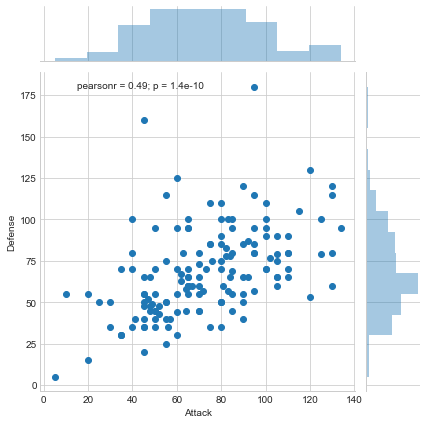

In [28]:
# joint plot

sns.jointplot(x='Attack',y='Defense',data=poke)

In [29]:
#Tutorial complete!